In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
players = pd.read_csv('./data/matches/goalscorers.csv')
rankings = pd.read_csv('./data/fifa_rankings.csv')

In [3]:
players

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
10767,2022-02-05,Cameroon,Burkina Faso,Cameroon,Vincent Aboubakar,85.0,False,False
10768,2022-02-05,Cameroon,Burkina Faso,Cameroon,Vincent Aboubakar,87.0,False,False
10769,2022-06-01,Italy,Argentina,Argentina,Lautaro Martínez,28.0,False,False
10770,2022-06-01,Italy,Argentina,Argentina,Ángel Di María,45.0,False,False


In [7]:
players.info()
players.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       10772 non-null  object 
 1   home_team  10772 non-null  object 
 2   away_team  10772 non-null  object 
 3   team       10772 non-null  object 
 4   scorer     10723 non-null  object 
 5   minute     10618 non-null  float64
 6   own_goal   10772 non-null  bool   
 7   penalty    10772 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 526.1+ KB


,minute
count,10618.000000
mean,50.757111
std,27.013747
min,1.000000
25%,28.000000
50%,52.000000
75%,74.000000
max,122.000000


In [6]:
# columns and number of missing values
num_missing = players.isna().sum()
num_missing[:]

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       154
own_goal       0
penalty        0
dtype: int64

<AxesSubplot: >

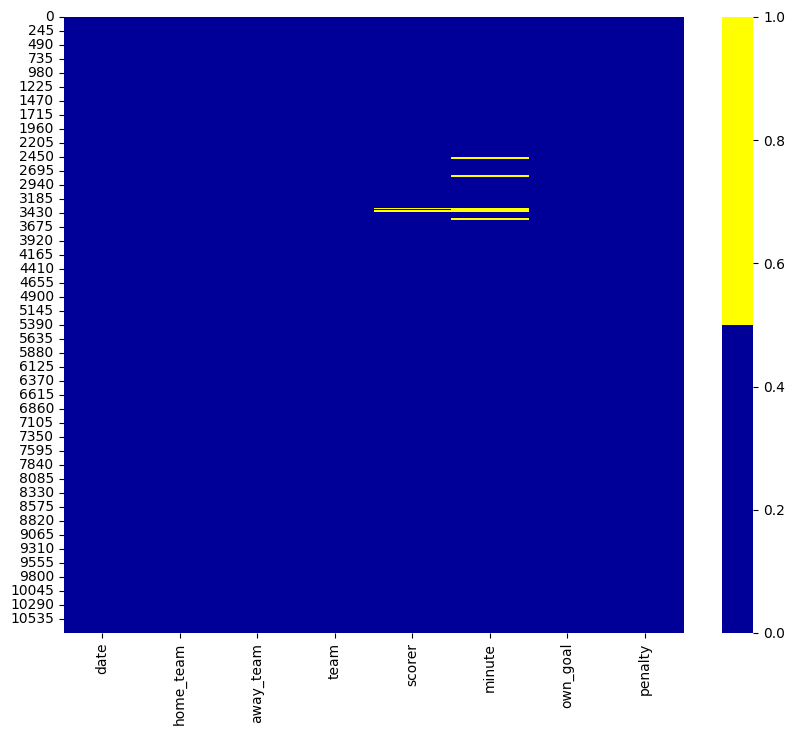

In [9]:
# Heatmap to visualize missing data
plt.figure(figsize=(10,8))

# first 30 columns
cols = players.columns[:30]
colours =['#000099', '#ffff00']
sns.heatmap(players[cols].isna(), cmap=sns.color_palette(colours))

In [10]:
players.drop(players[players['scorer'].isna()].index, inplace=True)

In [12]:
players.reset_index(drop=True, inplace=True)

In [13]:
players

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
10718,2022-02-05,Cameroon,Burkina Faso,Cameroon,Vincent Aboubakar,85.0,False,False
10719,2022-02-05,Cameroon,Burkina Faso,Cameroon,Vincent Aboubakar,87.0,False,False
10720,2022-06-01,Italy,Argentina,Argentina,Lautaro Martínez,28.0,False,False
10721,2022-06-01,Italy,Argentina,Argentina,Ángel Di María,45.0,False,False


In [14]:
# columns and number of missing values
num_missing = players.isna().sum()
num_missing[:]

date           0
home_team      0
away_team      0
team           0
scorer         0
minute       105
own_goal       0
penalty        0
dtype: int64

In [16]:
rankings['rank_date'].iloc[0]

'1992-12-31'

In [17]:
# Trim matches
players_trimmed = players.drop(players[players['date'] <= rankings['rank_date'].iloc[0]].index)
players_trimmed

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
4653,1993-02-24,Argentina,Denmark,Denmark,Néstor Craviotto,12.0,True,False
4654,1993-02-24,Argentina,Denmark,Argentina,Claudio Caniggia,30.0,False,False
4655,1993-06-15,Ecuador,Venezuela,Ecuador,Carlos Muñoz,19.0,False,False
4656,1993-06-15,Ecuador,Venezuela,Ecuador,Raúl Noriega,32.0,False,False
4657,1993-06-15,Ecuador,Venezuela,Ecuador,Ángel Fernández,57.0,False,False
...,...,...,...,...,...,...,...,...
10767,2022-02-05,Cameroon,Burkina Faso,Cameroon,Vincent Aboubakar,85.0,False,False
10768,2022-02-05,Cameroon,Burkina Faso,Cameroon,Vincent Aboubakar,87.0,False,False
10769,2022-06-01,Italy,Argentina,Argentina,Lautaro Martínez,28.0,False,False
10770,2022-06-01,Italy,Argentina,Argentina,Ángel Di María,45.0,False,False
